## Import Libraries

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import PredefinedSplit
from sklearn import tree
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

## Load Features

In [15]:
# Export feature table to file
feature_df = pd.read_csv("../Data/Features/features_200209.csv",index_col=0)
feature_df

,HomeTeam,AwayTeam,Date,Season,Div,FTR,home_prev_3_result,home_prev_3_win,home_prev_3_loss,home_prev_3_draw,...,x5_LWW,x5_WDD,x5_WDL,x5_WDW,x5_WLD,x5_WLL,x5_WLW,x5_WWD,x5_WWL,x5_WWW
0,Bournemouth,Aston Villa,2015-08-08,1516,E0,A,WWD,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Chelsea,Swansea,2015-08-08,1516,E0,D,WLD,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Everton,Watford,2015-08-08,1516,E0,D,LWL,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Leicester,Sunderland,2015-08-08,1516,E0,H,WDW,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Man United,Tottenham,2015-08-08,1516,E0,H,DDW,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,Newcastle,West Brom,2011-05-22,1011,E0,D,DWL,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16772,Stoke,Wigan,2011-05-22,1011,E0,A,LWD,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16773,Tottenham,Birmingham,2011-05-22,1011,E0,H,WLD,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16774,West Ham,Sunderland,2011-05-22,1011,E0,A,LDL,0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Fix data types
feature_df['Date'] = feature_df['Date'].apply(func=datetime.datetime.strptime,args=["%Y-%m-%d"])
feature_df['Season'] = feature_df['Season'].apply(func=str)
feature_df['Season'] = feature_df['Season'].apply(lambda x: '0'+x if len(x)<4 else x)
feature_df

,HomeTeam,AwayTeam,Date,Season,Div,FTR,home_prev_3_result,home_prev_3_win,home_prev_3_loss,home_prev_3_draw,...,x5_LWW,x5_WDD,x5_WDL,x5_WDW,x5_WLD,x5_WLL,x5_WLW,x5_WWD,x5_WWL,x5_WWW
0,Bournemouth,Aston Villa,2015-08-08,1516,E0,A,WWD,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Chelsea,Swansea,2015-08-08,1516,E0,D,WLD,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Everton,Watford,2015-08-08,1516,E0,D,LWL,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Leicester,Sunderland,2015-08-08,1516,E0,H,WDW,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Man United,Tottenham,2015-08-08,1516,E0,H,DDW,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,Newcastle,West Brom,2011-05-22,1011,E0,D,DWL,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16772,Stoke,Wigan,2011-05-22,1011,E0,A,LWD,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16773,Tottenham,Birmingham,2011-05-22,1011,E0,H,WLD,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16774,West Ham,Sunderland,2011-05-22,1011,E0,A,LDL,0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Check feature data types
dict(feature_df.dtypes)

{'HomeTeam': dtype('O'),
 'AwayTeam': dtype('O'),
 'Date': dtype('<M8[ns]'),
 'Season': dtype('O'),
 'Div': dtype('O'),
 'FTR': dtype('O'),
 'home_prev_3_result': dtype('O'),
 'home_prev_3_win': dtype('int64'),
 'home_prev_3_loss': dtype('int64'),
 'home_prev_3_draw': dtype('int64'),
 'home_prev_3_win_pct': dtype('float64'),
 'home_prev_3_loss_pct': dtype('float64'),
 'home_prev_3_gd': dtype('float64'),
 'home_prev_3_gc': dtype('float64'),
 'home_prev_3_gs': dtype('float64'),
 'home_prev_3_cs': dtype('int64'),
 'away_prev_3_result': dtype('O'),
 'away_prev_3_win': dtype('int64'),
 'away_prev_3_loss': dtype('int64'),
 'away_prev_3_draw': dtype('int64'),
 'away_prev_3_win_pct': dtype('float64'),
 'away_prev_3_loss_pct': dtype('float64'),
 'away_prev_3_gd': dtype('float64'),
 'away_prev_3_gc': dtype('float64'),
 'away_prev_3_gs': dtype('float64'),
 'away_prev_3_cs': dtype('int64'),
 'x0_Arsenal': dtype('float64'),
 'x0_Aston Villa': dtype('float64'),
 'x0_Birmingham': dtype('float64'),
 '

## Split Training and Test Datasets

In [18]:
cat_feature = ['HomeTeam','AwayTeam','Season','Div','home_prev_3_result','away_prev_3_result']
remove_feature = ['Date','FTR']
# Split final validation set (18-19 Season)
test_df = feature_df[feature_df['Season']=='1819']
train_df = feature_df[feature_df['Season']!='1819']
# Separate label from data
train_label = train_df['FTR']
test_label = test_df['FTR']
train_df = train_df.drop(remove_feature,axis=1)
test_df = test_df.drop(remove_feature,axis=1)
print(f"Size of training set: {len(train_df)}\nSize of test set: {len(test_df)}\nNumber of features: {train_df.shape[1]}")

Size of training set: 3800
Size of test set: 380
Number of features: 162


In [19]:
# Seasons for doing a grouped k-fold cross-validation
cv_seasons = list(train_df['Season'].unique())
cv_seasons.sort()
cv_seasons

['0809',
 '0910',
 '1011',
 '1112',
 '1213',
 '1314',
 '1415',
 '1516',
 '1617',
 '1718']

In [20]:
# Define cross-validation folds
cv_fold = []
for ind,season in enumerate(cv_seasons):
    test_seasons = cv_seasons[ind]
    buffer_seasons = None
    if ind < (len(cv_seasons)-1):
        buffer_seasons = cv_seasons[ind+1]
    train_seasons = [s for s in cv_seasons if s not in [test_seasons,buffer_seasons]]
    train_ind = np.array(train_df['Season'].isin(train_seasons))
    test_ind = np.array(train_df['Season'].isin([test_seasons]))
    cv_fold.append((train_ind,test_ind))
cv_fold

[(array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ..., False, False, False]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ..., False, False, False]),
  array([False, False, False, ...,  True,  True,  True])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([False, False, False, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([False, False, False, ...,  True,  True,  True]),
  array([ True,  True,  True, ..., False, False, False])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  arra

In [21]:
# Drop categorical features (already one-hot-encoded)
train_df = train_df.drop(cat_feature,axis=1)
test_df = test_df.drop(cat_feature,axis=1)

## Training Decision Tree Model

In [22]:
# Hyperparameter tuning (Cross-validation)
max_depth = [2,4,8,16,32]
acc_score = []
for depth in max_depth:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(clf,X=train_df,y=train_label,cv=cv_fold)
    acc_score.append((depth,scores['test_score'].mean()))
acc_score

[(2, 0.45473684210526316),
 (4, 0.4602631578947368),
 (8, 0.4594736842105263),
 (16, 0.44263157894736843),
 (32, 0.4121052631578947)]

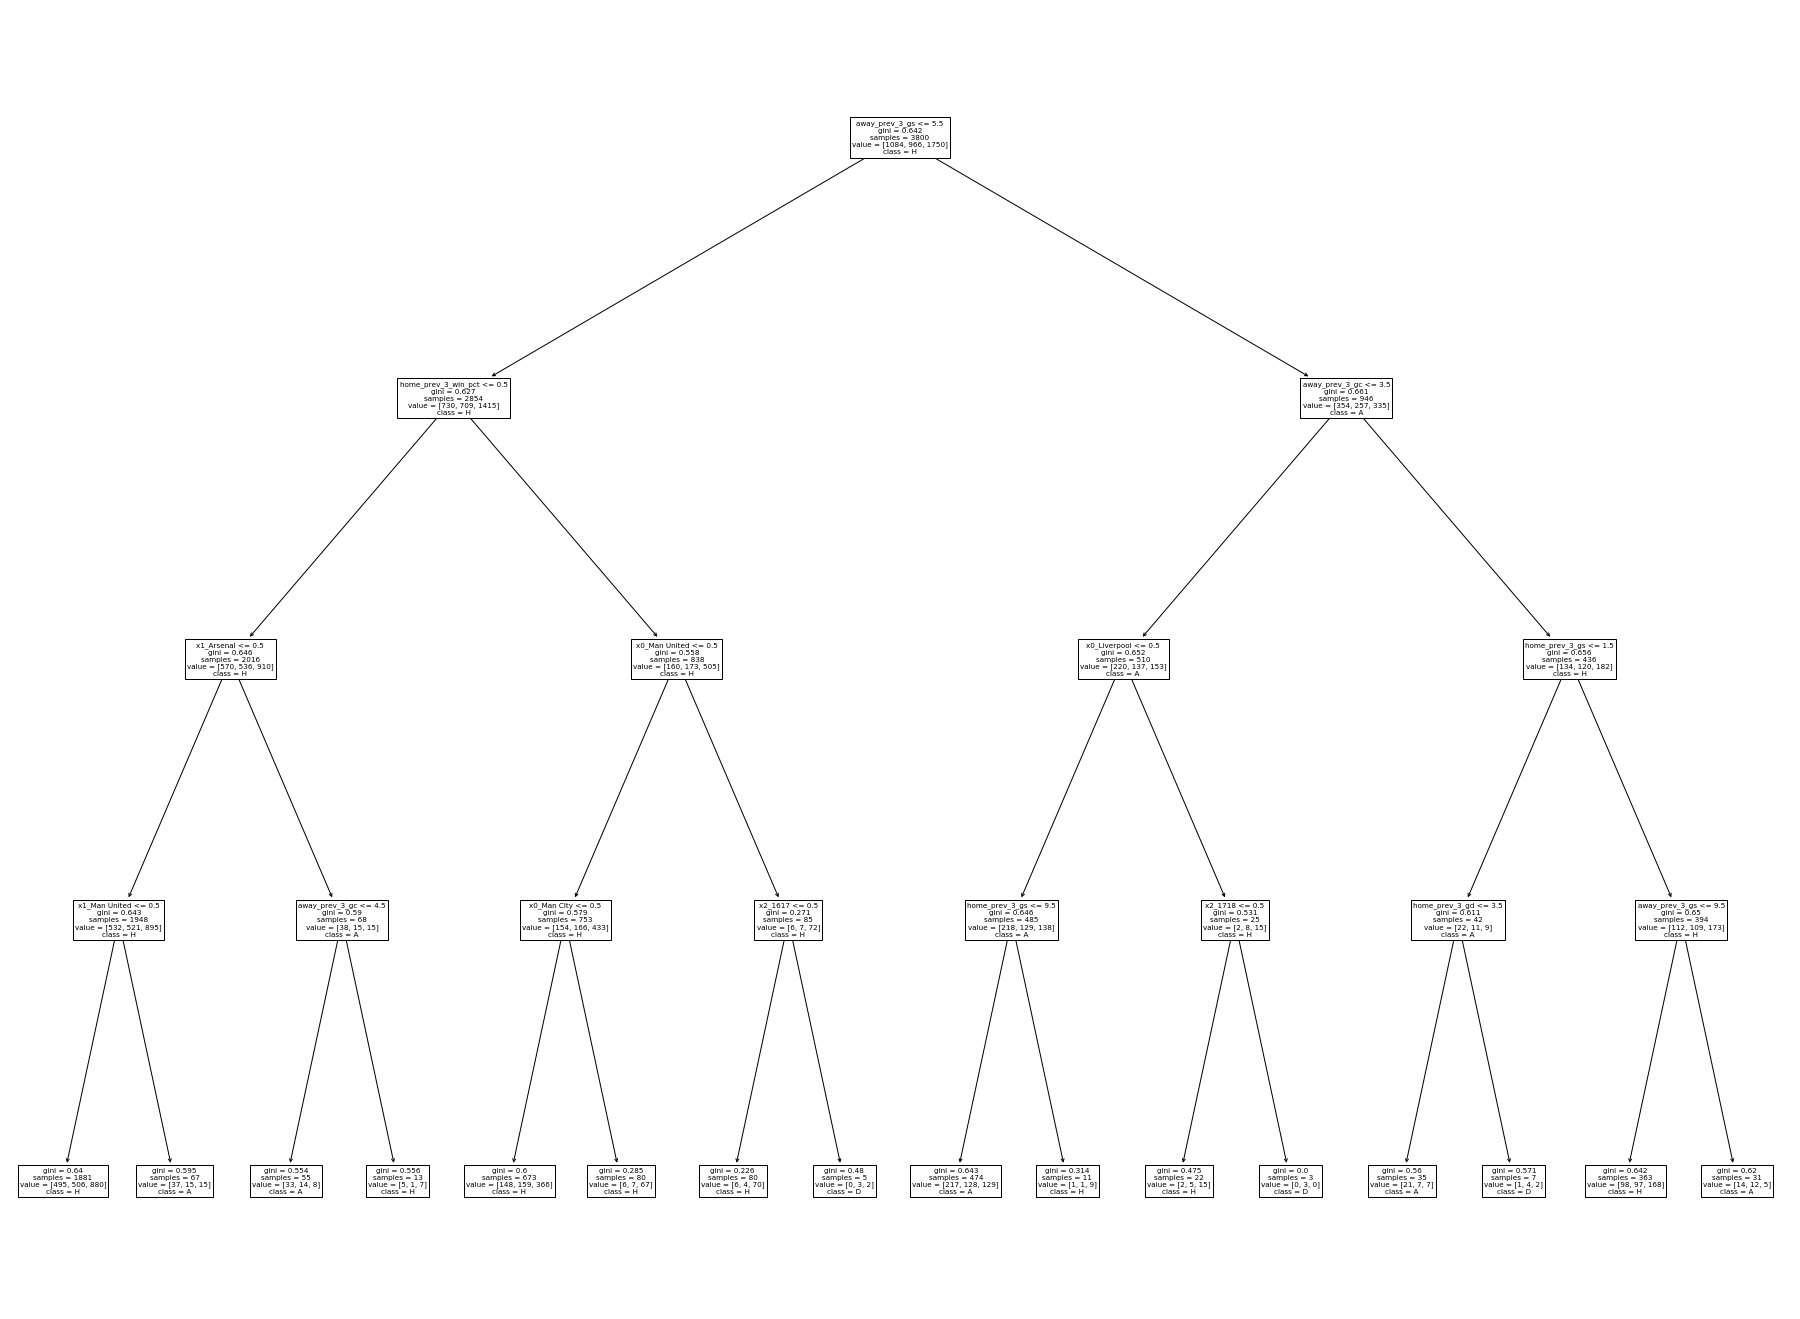

In [23]:
# Train decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X=train_df,y=train_label)
plt.figure(figsize=[6.4*5,4.8*5])
tree.plot_tree(clf,feature_names=train_df.columns,class_names=clf.classes_)
plt.show()

In [24]:
# Test decision tree classifier
clf.score(test_df,test_label)

0.5210526315789473

In [25]:
feature_importance = []
for i,f in enumerate(list(train_df.columns)):
    feature_importance.append((f,clf.feature_importances_[i]))
feature_importance.sort(key=(lambda x: x[1]), reverse=True)
feature_importance

[('away_prev_3_gs', 0.24398547087766012),
 ('home_prev_3_win_pct', 0.1761576796059116),
 ('x1_Man United', 0.08021012260801774),
 ('away_prev_3_gc', 0.07955045847976687),
 ('x1_Arsenal', 0.07908782134997369),
 ('x0_Man City', 0.07902539908390739),
 ('home_prev_3_gs', 0.07775836545657436),
 ('x0_Man United', 0.07243472041394325),
 ('x0_Liverpool', 0.04853542319013167),
 ('x2_1718', 0.024139057048060786),
 ('x2_1617', 0.021459071647123476),
 ('home_prev_3_gd', 0.017656410238929058),
 ('home_prev_3_win', 0.0),
 ('home_prev_3_loss', 0.0),
 ('home_prev_3_draw', 0.0),
 ('home_prev_3_loss_pct', 0.0),
 ('home_prev_3_gc', 0.0),
 ('home_prev_3_cs', 0.0),
 ('away_prev_3_win', 0.0),
 ('away_prev_3_loss', 0.0),
 ('away_prev_3_draw', 0.0),
 ('away_prev_3_win_pct', 0.0),
 ('away_prev_3_loss_pct', 0.0),
 ('away_prev_3_gd', 0.0),
 ('away_prev_3_cs', 0.0),
 ('x0_Arsenal', 0.0),
 ('x0_Aston Villa', 0.0),
 ('x0_Birmingham', 0.0),
 ('x0_Blackburn', 0.0),
 ('x0_Blackpool', 0.0),
 ('x0_Bolton', 0.0),
 ('x0_B